<a href="https://colab.research.google.com/github/xuexi21/CTA/blob/main/CTA_GROUP_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section




# Data Preprocessing Ado

## Importing and loading packages and data

Packages:

In [ ]:
! pip install -q unidecode pyspellchecker autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import string
import re
import nltk
import spacy

In [ ]:
import pandas as pd

In [ ]:
import io

Dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleantech_media_dataset_v1_20231109.csv to cleantech_media_dataset_v1_20231109.csv


In [ ]:
file_key = list(uploaded.keys())[0]

In [ ]:
df = pd.read_csv(io.StringIO(uploaded[file_key].decode('utf-8')))

In [ ]:
df.head()

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


# Experiment_Kai

Pipeline\
**Stage 1: Data cleaning, preprocessing, and exploratory data analysis including topic modelling.**\
In this step, students get a first overview of the dataset and learn to prepare it for the subsequent NLP analyses. This could involve the following tasks:

● Data Collection and Cleaning
- Acquire a comprehensive dataset of cleantech texts.
- Perform data cleaning to remove irrelevant information, special characters, and duplicates.

● Text Preprocessing
- Tokenize the text data into words or phrases.
- Apply stemming or lemmatization to reduce words to their root form.
- Remove stop words and non-informative terms.
- Convert text to lowercase for consistency.

● Exploratory Data Analysis (EDA)
- Compute basic statistics such as word counts, document lengths, and term frequencies.
- Create word clouds to visualize the most frequent terms.
- Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
- Identify outliers or anomalies in the data.
- Visualize the distribution of texts with scatter plots or other suitable visualization techniques.

● Topic Modeling
Test topic modeling techniques such as
- LDA and NMF (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF),
- Top2Vec (https://github.com/ddangelov/Top2Vec) and
- BERTopic (https://github.com/MaartenGr/BERTopic).

- Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

- Evaluate the quality of the topics.

- Refine the topic model based on evaluation results and domain expertise.

Outputs:

- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.



## Set up

In [1]:
# Mount Google drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# import the packages.
import pandas as pd
from pathlib import Path
import string
import re
import nltk
import spacy
from textblob import TextBlob



● Data Collection and Cleaning
- Acquire a comprehensive dataset of cleantech texts.
- Perform data cleaning to remove irrelevant information, special characters, and duplicates.


In [ ]:
# Load dataset
data_folder = Path("/content/drive/MyDrive/HSLU/CTA/")
cleantech = data_folder / "cleantech_media_dataset_v1_20231109.csv"
# Inspect the data frame
df = pd.read_csv(cleantech)
df.head()

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [ ]:
# Inspect the dimensionality of your DataFrame. The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns).
df.shape

(9607, 7)

In [ ]:
# Remove unused coloumns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Print information about your DataFrame. You can inspect the total memory usage, the data type of each column, and the number of non-NaN elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9607 non-null   object
 1   date     9607 non-null   object
 2   author   31 non-null     object
 3   content  9607 non-null   object
 4   domain   9607 non-null   object
 5   url      9607 non-null   object
dtypes: object(6)
memory usage: 450.5+ KB


In [ ]:
# the dataset is clean only the author columns have a lot of missing. so I deciend to drop it.
df.drop('author', axis=1, inplace=True)

In [ ]:
# transfer to lower cases
df['content'] = df['content'].apply(lambda x: x.lower())

In [ ]:
# removing punctuations
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# df.head()

In [ ]:
# removing html tags
df['content'] = df['content'].apply(lambda x: re.sub('<[^<]+?>', '', x))

In [ ]:
## Newlines, spaces and tabs removal
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))


In [ ]:
# Replacing Accented Characters
# !pip install unidecode
import unidecode
df['content'] = df['content'].apply(lambda x: unidecode.unidecode(x))


In [ ]:
# Remove special characters
df['content'] = df['content'].replace(to_replace=r'[^a-zA-Z0-9 ]', value='', regex=True)
# df.head()


In [ ]:
# Remove duplicates
df.drop_duplicates(subset='content', keep='first', inplace=True)


In [ ]:
# !pip install autocorrect

In [ ]:

#=============================
# from spellchecker import SpellChecker

# spell = SpellChecker()

# def correct_spelling(text):
#     corrected_text = list()
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         next_word = word
#         if word in misspelled_words:
#             next_word = spell.correction(word)
#         corrected_text.append(next_word)

#     return " ".join(corrected_text)

#-------------------------------------
# using autocorrect but take too long time. so ignore the spelling for now.
#-------------------------------------
# from autocorrect import Speller

# speller = Speller(lang='en')
# df['content'] = df['content'].apply(lambda x: speller(x))





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9602 entries, 0 to 9606
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9602 non-null   object
 1   date     9602 non-null   object
 2   content  9602 non-null   object
 3   domain   9602 non-null   object
 4   url      9602 non-null   object
dtypes: object(5)
memory usage: 450.1+ KB



● Text Preprocessing
- Tokenize the text data into words or phrases.
- Apply stemming or lemmatization to reduce words to their root form.
- Remove stop words and non-informative terms.
- Convert text to lowercase for consistency.


In [ ]:
# df.head()

In [ ]:
# Tokenize Words
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['tokens'] = df['content'].apply(lambda x: word_tokenize(x))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

# Add 'content lenght'
df['content lenght'] = df['content'].astype(str).apply(len)

# Add simple token count
df['Num Tokens'] = df['content'].apply(lambda x: len(str(x).split()))

# Add polarity
df['Polarity'] = df['content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
df.head()

,title,date,content,domain,url,tokens,content lenght,Num Tokens,Polarity
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,qatar petroleum qp is targeting aggressive cut...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, is, targeting, aggressi...",2611,442,0.067613
1,India Launches Its First 700 MW PHWR,2021-01-15,nuclear power corp of india ltd npcil synchro...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[nuclear, power, corp, of, india, ltd, npcil, ...",3271,538,0.087188
2,New Chapter for US-China Energy Trade,2021-01-20,new us president joe biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[new, us, president, joe, biden, took, office,...",4192,706,-0.032344
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,the slow pace of japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[the, slow, pace, of, japanese, reactor, resta...",4273,687,0.013495
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,two of new york citys largest pension funds sa...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[two, of, new, york, citys, largest, pension, ...",2426,394,0.012512


## Stopwords Removal. using - Gensim

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
df['filtered_gensim'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in STOPWORDS])
df.head(1)

,title,date,content,domain,url,tokens,content lenght,Num Tokens,Polarity,filtered_gensim
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,qatar petroleum qp is targeting aggressive cut...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, is, targeting, aggressi...",2611,442,0.067613,"[qatar, petroleum, qp, targeting, aggressive, ..."


## Lemmatization <a name="lemma"></a>

For lemmatization we'll ignore punctuations. Tokenization step using `re` gives us exactly that.

In [ ]:
lemma_step1 = df['filtered_gensim'].apply(lambda x: " ".join([word for word in x]))

In [ ]:
nlp = spacy.load("en_core_web_sm")
df['spacy_lemmas'] = lemma_step1.apply(lambda x: [word.lemma_ for word in nlp(x)])

In [ ]:
df.head(1)

,title,date,content,domain,url,tokens,content lenght,Num Tokens,Polarity,filtered_gensim,spacy_lemmas
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,qatar petroleum qp is targeting aggressive cut...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, is, targeting, aggressi...",2611,442,0.067613,"[qatar, petroleum, qp, targeting, aggressive, ...","[qatar, petroleum, qp, target, aggressive, cut..."


## Stemming with `nltk`
### Using `PorterStemmer()`


In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
df['stem'] = df['spacy_lemmas'].apply(lambda x: [ps.stem(w) for w in x])

In [ ]:
df.head(1)

,title,date,content,domain,url,tokens,content lenght,Num Tokens,Polarity,filtered_gensim,spacy_lemmas,stem
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,qatar petroleum qp is targeting aggressive cut...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...,"[qatar, petroleum, qp, is, targeting, aggressi...",2611,442,0.067613,"[qatar, petroleum, qp, targeting, aggressive, ...","[qatar, petroleum, qp, target, aggressive, cut...","[qatar, petroleum, qp, target, aggress, cut, g..."



● Exploratory Data Analysis (EDA)
- Compute basic statistics such as word counts, document lengths, and term frequencies.
- Create word clouds to visualize the most frequent terms.
- Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
- Identify outliers or anomalies in the data.
- Visualize the distribution of texts with scatter plots or other suitable visualization techniques.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9602 entries, 0 to 9606
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            9602 non-null   object 
 1   date             9602 non-null   object 
 2   content          9602 non-null   object 
 3   domain           9602 non-null   object 
 4   url              9602 non-null   object 
 5   tokens           9602 non-null   object 
 6   content lenght   9602 non-null   int64  
 7   Num Tokens       9602 non-null   int64  
 8   Polarity         9602 non-null   float64
 9   filtered_gensim  9602 non-null   object 
 10  spacy_lemmas     9602 non-null   object 
 11  stem             9602 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
df.to_csv(data_folder / "out.csv")

In [14]:
data_folder = Path("/content/drive/MyDrive/HSLU/CTA/")
cleantech = data_folder / "out.csv"
# Inspect the data frame
df = pd.read_csv(cleantech)

Text(0.5, 1.0, 'Polarity distribution')

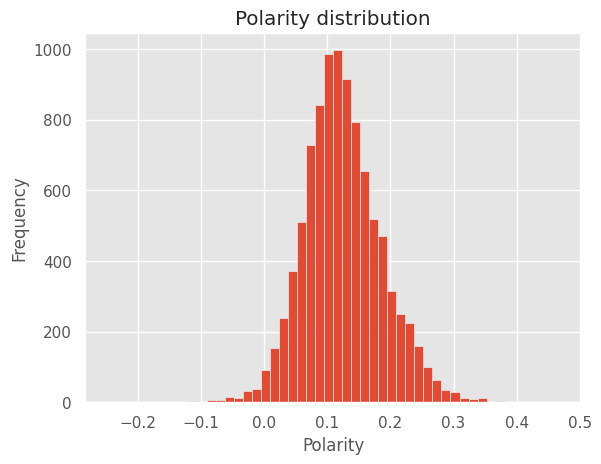

In [15]:
# Plot the distribution of polarity sentiment score
# change plotting colors per client request
import matplotlib.pyplot as plt


plt.style.use('ggplot')
df['Polarity'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

In [16]:
# Remove unused coloumns
df.drop('Unnamed: 0', axis=1, inplace=True)
# df.drop('content', axis=1, inplace=True)
df.drop('tokens', axis=1, inplace=True)
df.drop('filtered_gensim', axis=1, inplace=True)
df.drop('spacy_lemmas', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)

# Descriptive statistics of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           9602 non-null   object 
 1   date            9602 non-null   object 
 2   content         9602 non-null   object 
 3   domain          9602 non-null   object 
 4   content lenght  9602 non-null   int64  
 5   Num Tokens      9602 non-null   int64  
 6   Polarity        9602 non-null   float64
 7   stem            9602 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 600.2+ KB


In [17]:
# Descriptive statistics of your dataframe
df.describe()

,content lenght,Num Tokens,Polarity
count,9602.000000,9602.000000,9602.000000
mean,4702.862841,762.422933,0.124844
std,2722.673651,448.852137,0.061622
min,1120.000000,193.000000,-0.247789
25%,2640.000000,425.000000,0.084188
50%,4050.500000,648.000000,0.120324
75%,6025.250000,981.000000,0.161638
max,18815.000000,2985.000000,0.466667


In [18]:
# Take a look at our new features
df.iloc[0][['stem', 'content lenght', 'Num Tokens']]

stem              ['qatar', 'petroleum', 'qp', 'target', 'aggres...
content lenght                                                 2611
Num Tokens                                                      442
Name: 0, dtype: object

## Exploratory Text Analysis (ETA)

Some of the text features' analysis were recently implemented in pandas profiling. However, a lot of them are still missing. Let's take a look at how to build them ourselves.


### word clouds

In [ ]:
# Let's start with some visuals
!pip install WordCloud

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Set preferences
sns.set(color_codes=True)

In [8]:
# Get all review texts
all_tockens = df['stem']
all_tockens[-1:]

9601    ['arevon', 'energi', 'close', 'financ', 'vike'...
Name: stem, dtype: object

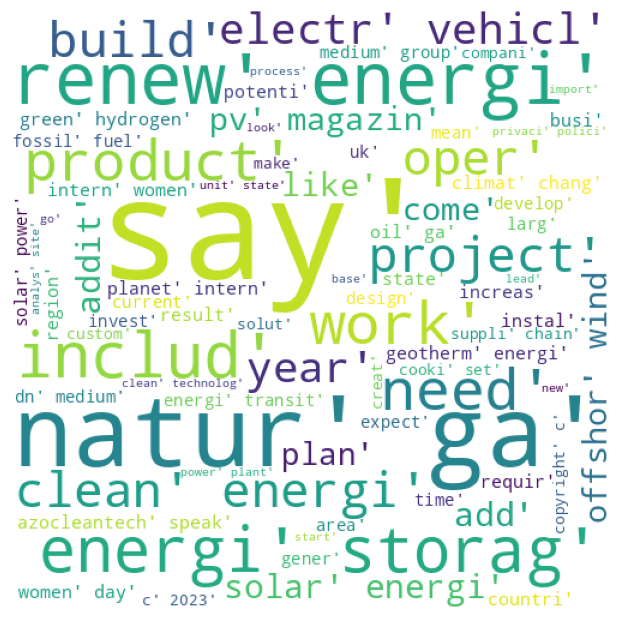

In [9]:
# Now let's generate a wordcloud for some reviews
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(all_tockens.str.cat())

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Unigrams

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['content'], 20)

unigrams_w_stops = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_w_stops

,word,count
0,the,411980
1,to,221759
2,and,216565
3,of,203922
4,in,150226
5,for,92385
6,is,86513
7,that,64474
8,energy,62495
9,with,54866


Text(0.5, 1.0, 'Unigrams with stopwords')

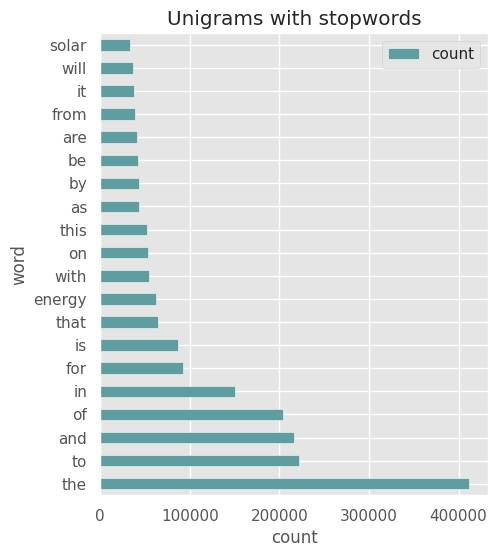

In [20]:
unigrams_w_stops.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams with stopwords')

In [21]:
# Unigrams after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['content'], 20)
unigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams

,word,count
0,energy,62495
1,solar,33505
2,new,21050
3,power,20294
4,gas,19175
5,said,16972
6,data,14186
7,project,14053
8,storage,13706
9,geothermal,12752


Text(0.5, 1.0, 'Unigrams w/o stopwords')

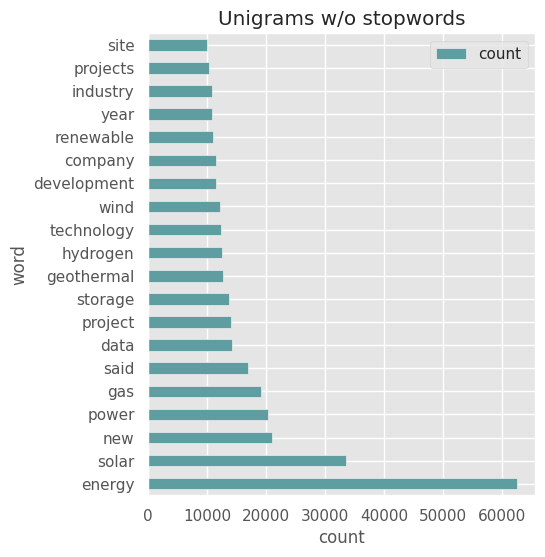

In [22]:
unigrams.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams w/o stopwords')

### scatter matrix


<Axes: xlabel='content lenght', ylabel='Polarity'>

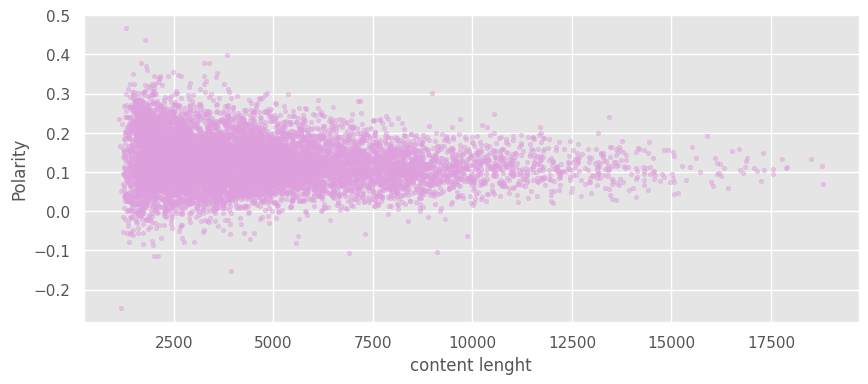

In [36]:
#Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!
df.plot(kind='scatter', x='content lenght', y='Polarity', \
        color='plum', figsize=(10,4), s=10, alpha=0.5)

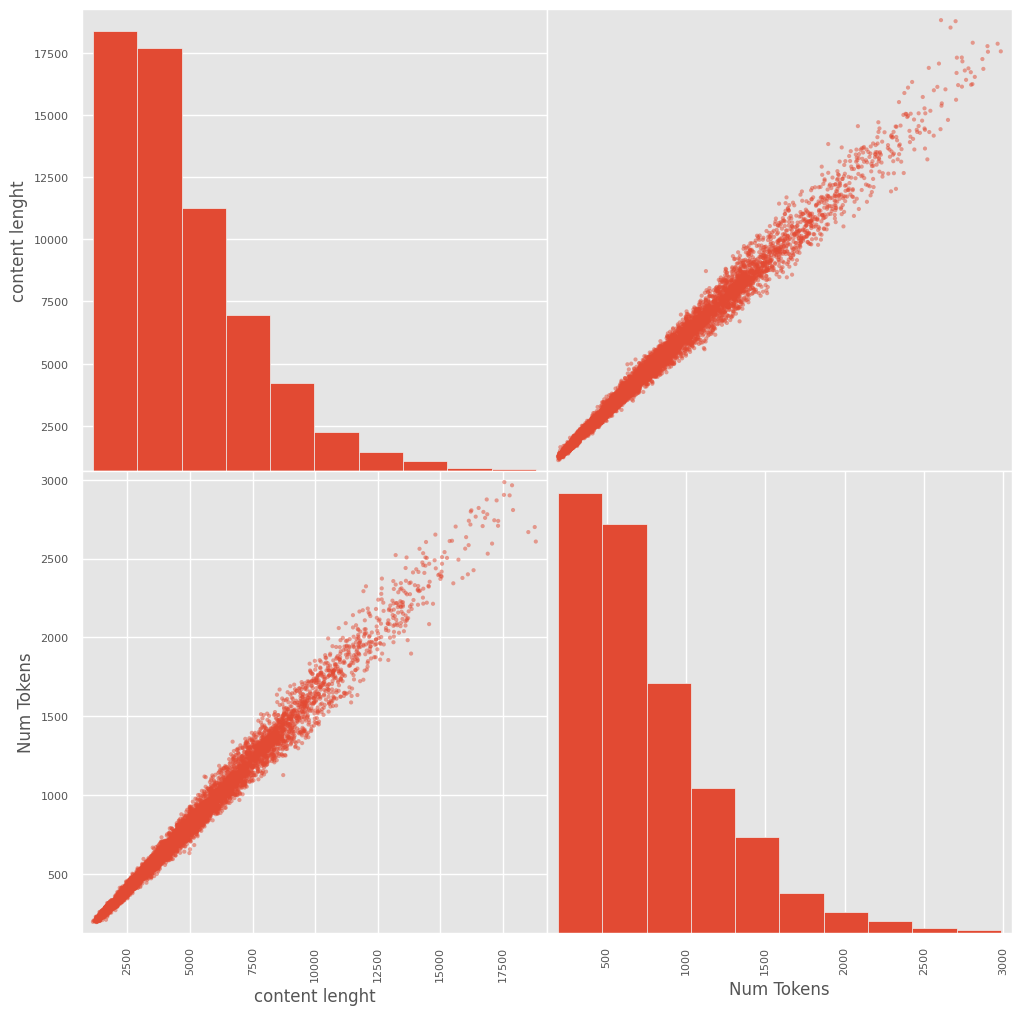

In [35]:
pd.plotting.scatter_matrix(
    df.select_dtypes(include=['number','float']).iloc[:,-8:-1],
    figsize=(12,12)
);

## Topic Modeling
Test topic modeling techniques such as
- LDA and NMF (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF),
- Top2Vec (https://github.com/ddangelov/Top2Vec) and
- BERTopic (https://github.com/MaartenGr/BERTopic).

- Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

- Evaluate the quality of the topics.

- Refine the topic model based on evaluation results and domain expertise.

Outputs:

- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.


#### We Train a Word2vec model

In [40]:
# Now We train a Word2Vec model
import gensim
# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 20          # Context window size
min_word_count = 2   # Minimum word count

# Initialize and train the Word2Vec model


w2v_model = gensim.models.Word2Vec(sentences=df['tockens'].tolist(), vector_size=feature_size, window=window_context, min_count=min_word_count)
# w2v_model = gensim.models.Word2Vec(sentences=df['stem'].tolist(), vector_size=feature_size, window=window_context, min_count=min_word_count).  # kai

# Get vocabulary count of the model
print("Vocabulary size:", len(w2v_model.wv.index_to_key))
print("Vocabulary:", w2v_model.wv.index_to_key)

KeyError: ignored

We play a bit around with our word embeddings, looking for similar words for example, or calculating the similarity between words. For example for 'renewable', which is contained in our vocabulary, we receive similar words such as 'renewables', 'clean' or 'carbonfree'.

In [39]:
# Inspect most similar words
w2v_model.wv.most_similar('renewable', topn=5)

KeyError: ignored

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in ['energy', 'project', 'company', 'production', 'climate', 'emissions']
}
similar_words

We then visualize our word embeddings in a 2-dimensional space, using the T-SNE algorithm. It is interesting that we see related words like 'University', 'Study', 'Experience', 'Report' close to each other. There are also many other interesting / related clusters like that 'CEO', 'President', 'Executive', 'Interview'.

In [ ]:
from sklearn.manifold import TSNE
import numpy as np


In [ ]:
words = w2v_model.wv.index_to_key[200:350]
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for i, label in enumerate(labels):
    ax.annotate(label, xy=(T[i, 0], T[i, 1]), xytext=(5, -5), textcoords='offset points')
plt.show()

NameError: ignored